In [ ]:
# Supervised Machine Learning
# Simple Linear Regression 
# Stage 1 : Load the Dataset

import pandas as pd
df = pd.read_csv('https://trello-attachments.s3.amazonaws.com/60596dc01945760f799067c1/60596de489cb5c450c8f5486/065ce37bfc17bac4b7599d8813238102/Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [ ]:
# Basic Data Exploration
print(df.columns)

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')


In [ ]:
# Check the dimension 
df.shape

(9, 4)

               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


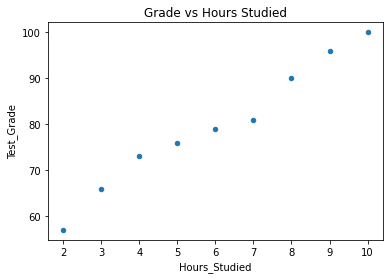

In [ ]:
# Stage 2 : Selection
# Selection --> Dependent and Independent Variable

import matplotlib.pyplot as plt
df.plot(kind='scatter',x='Hours_Studied',y='Test_Grade',title='Grade vs Hours Studied')
# check the correlation between your variables
print(df.corr())

In [ ]:
# Stage 3 and 4 : Preprocessing And Transformation
# 1.) Remove Missing Values
# 2.) Convert Categorical Value In Numerical
# 3.) Normalization

df.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [ ]:
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()
print('Before Conversion\n\n',df)

Before Conversion

    Hours_Studied  Test_Grade Status Result
0              2          57   fail      D
1              3          66   fail      D
2              4          73   pass      C
3              5          76   pass      C
4              6          79   pass      C
5              7          81   pass      B
6              8          90   pass      B
7              9          96   pass      A
8             10         100   pass      A


In [ ]:
df.Status = lb.fit_transform(df.Status)
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [ ]:
# Normalization
# Change scale of multiple variable to a same range [0-1]
# Why Data Normalization is necessary for machine learning?
# Min-Max Scaling
# Xnorm = (X-Xmin)/(Xmax -Xmin)
# X = 57
# Xmin = 57
# Xmax = 100
# Xnorm = (57-57)/(100-57)
# Xnorm = 0/43 --> 0

In [ ]:
# Dependent Variable
Y = df.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [ ]:
# Independent Variable
X = df.Hours_Studied.values
X

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Independent Variable will always be a 2D Array
import numpy as np
# numpy.newaxis --> is used to increase the dimensions of the existing array
# by adding one more dimensions.
# which means 1D array will become 2D array
# Row Vector      arr[np.newaxis,:]  --> (1,9)
# Column Vector   arr[:,np.newaxis]  --> (9,1)
X = df.Hours_Studied[:,np.newaxis]
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
# Normalization Using Min Max Scaling
Xnorm = (X-X.min())/(X.max()-X.min())
Xnorm

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [0.875],
       [1.   ]])

In [ ]:
Ynorm = (Y-Y.min())/(Y.max()-Y.min())
Ynorm

array([0.        , 0.20930233, 0.37209302, 0.44186047, 0.51162791,
       0.55813953, 0.76744186, 0.90697674, 1.        ])

In [ ]:
# Stage 5 : Data Mining
# Apply Simple Linear Regression Equation on Dataset
# y' = mX + c
# where y' is the output
# m is coefficient (slope)  change in y with respect to x
# c is constant(value of Y when X is zero)

import sklearn.linear_model as lm
lr = lm.LinearRegression()

# Train our Model
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the predicted valeus
lr.predict(X)

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

In [ ]:
df['PredictedValues'] = lr.predict(X)
df[['Hours_Studied','Test_Grade','PredictedValues']]

,Hours_Studied,Test_Grade,PredictedValues
0,2,57,59.711111
1,3,66,64.727778
2,4,73,69.744444
3,5,76,74.761111
4,6,79,79.777778
5,7,81,84.794444
6,8,90,89.811111
7,9,96,94.827778
8,10,100,99.844444


In [ ]:
# Predict the Test_Grade on The Basis of Hours_Studied

hrs = int(input('Enter Study Hours: '))
marks = lr.predict([[hrs]])
print('Student who studies for', hrs,'hours will going to score',marks,'marks')

Enter Study Hours: 5
Student who studies for 5 hours will going to score [74.76111111] marks


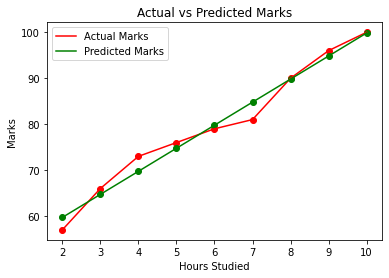

In [ ]:
# Plot Actual VS Predicted
plt.plot(X,Y,color='red',label='Actual Marks')
plt.scatter(X,Y,color='red')
# Plot Predicted Values
plt.plot(X,lr.predict(X), color='green', label='Predicted Marks')
plt.scatter(X,lr.predict(X), color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Marks')
plt.title('Actual vs Predicted Marks')
plt.legend()
plt.show()

In [ ]:
# Evaluate the accuracy of the model
# r2_score

from sklearn.metrics import r2_score
accuracy = r2_score(Y, lr.predict(X))
print('Accuracy of our model is: ', accuracy)

Accuracy of our model is:  0.9757431074095347
